# Logistic Regression for Lyrics Genre Classification

Text classification is the task of sorting text documents into predefined classes. 

## Data set

The data bla bla..

We start by loading these files into two separate data frames.

In [8]:
import pandas as pd
import numpy as np
import zipfile
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Loading data to a pandas dataframe
with zipfile.ZipFile('data/archive.zip') as myJson:
    with myJson.open('News_Category_Dataset_v2.json') as z:
        data = pd.read_json(z, lines=True)

When you inspect the two data frames, you can see that there are three labelled columns: `id` (the official speech ID), `words` (the space-separated words of the speech), and `party` (the party of the speaker, represented by its customary abbreviation).

In [9]:
from helper_functions import preprocess
df, genres = preprocess(data)

Name of genres in data.

In [10]:
genres = sorted(df['label'].unique())
print(genres)

[0, 1, 2, 3, 4, 5]


## Visualization

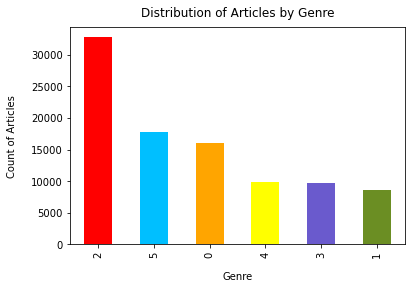

In [11]:
# Visualization of classes
colors = ['red', 'deepskyblue', 'orange', 'yellow', 'slateblue', 'olivedrab']


df['label'].value_counts().plot(kind='bar', color = colors)
plt.xlabel("Genre", labelpad=14)
plt.ylabel("Count of Articles", labelpad=14)
plt.title("Distribution of Articles by Genre", y=1.02)
plt.show()

In [12]:
# Split train and test
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'])

# Split train and validation
print(df.shape)
print(train_df.shape)
print(test_df.shape)

(94837, 2)
(75869, 2)
(18968, 2)


## Train Model

### Baseline models

In [13]:
# Train model
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

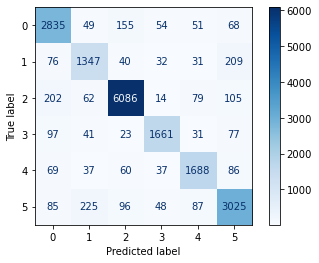

In [14]:
# Logistic Regression with Counter Words Vector representation - Default values kind of thing

pipe = Pipeline(steps=[('preprocessor', CountVectorizer(stop_words='english')),
                       ('model', LogisticRegression(max_iter=1000,
                                                    class_weight='balanced'))])

fit_pipe = pipe.fit(train_df['text'], train_df['label'])

# TODO: Write code here to solve Problem 5
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from numpy import interp

plot_confusion_matrix(fit_pipe, test_df['text'], test_df['label'], cmap=plt.cm.Blues)

plt.show()

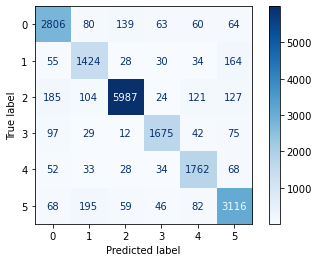

In [15]:
# Logistic Regression with TF-IDF representation - Default values kind of thing

from sklearn.feature_extraction.text import TfidfVectorizer

pipe = Pipeline(steps=[('preprocessor', TfidfVectorizer(stop_words='english')),
                       ('model', LogisticRegression(max_iter=1000,
                                                    class_weight='balanced'))])

fit_pipe = pipe.fit(train_df['text'], train_df['label'])

# TODO: Write code here to solve Problem 5
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from numpy import interp

plot_confusion_matrix(fit_pipe, test_df['text'], test_df['label'], cmap=plt.cm.Blues)

plt.show()

### Grid Search

# Logistic Regression with Counter Words Vector representation


from sklearn.model_selection import GridSearchCV

# Hyperparameters values
parameters = {'preprocessor__binary':[True, False],
              'preprocessor__ngram_range':((1,1),(1,2),(2,2)),
              'model__penalty': ('l2','elasticnet'),
              'model__solver': ('newton-cg', 'saga')}

grid_search = GridSearchCV(pipe, parameters)

gs_fit = grid_search.fit(train_df['text'], train_df['label'])

best_parameters = grid_search.best_estimator_.get_params()

print("Best parameters set:")
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

### Fine-tuned Models

#### Logistic Regression with TF-IDF Vector representation

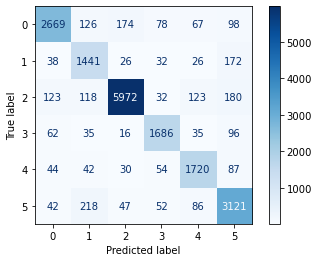

In [16]:
# Logistic Regression with TF-IDF representation

from sklearn.feature_extraction.text import TfidfVectorizer

pipe = Pipeline(steps=[('preprocessor', TfidfVectorizer(stop_words='english',
                                                        ngram_range=(1,2),
                                                        binary=True)),
                       ('model', LogisticRegression(max_iter=1000,
                                                    class_weight='balanced',
                                                    penalty='l2',
                                                    solver='newton-cg'))])

fit_pipe = pipe.fit(train_df['text'], train_df['label'])

# TODO: Write code here to solve Problem 5
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from numpy import interp

plot_confusion_matrix(fit_pipe, test_df['text'], test_df['label'], cmap=plt.cm.Blues)

plt.show()

In [17]:
preds = fit_pipe.predict(test_df['text'])

print(classification_report(test_df['label'], preds, zero_division = 0))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      3212
           1       0.73      0.83      0.78      1735
           2       0.95      0.91      0.93      6548
           3       0.87      0.87      0.87      1930
           4       0.84      0.87      0.85      1977
           5       0.83      0.88      0.85      3566

    accuracy                           0.88     18968
   macro avg       0.85      0.87      0.86     18968
weighted avg       0.88      0.88      0.88     18968



## Creating a balanced data set

As you saw in Problem&nbsp;1, the distribution of the speeches over the eight different parties (classes) is imbalanced. One technique used to alleviate this is **undersampling**, in which one randomly removes samples from over-represented classes until all classes are represented with the same number of samples.

Implement undersampling to create a balanced subset of the training data. Rerun the evaluation from Problem&nbsp;2 on the balanced data and compare the results. Discuss your findings in a short text. Would you argue that undersampling make sense for the task of predicting the party of a speaker?

**Hint:** Your balanced subset should consist of 5,752 speeches.

In [18]:
# TODO: Write code here to implement undersampling
# Number of observations of the smallest class
n_min = min(train_df['label'].value_counts())

# Sample n_min observations of each class
balanced = train_df.groupby('label').apply(lambda x: x.sample(n=n_min, replace=False))

print(balanced.shape)

(41652, 2)


#### LR with TF-IDF / fine-tuned / balanced

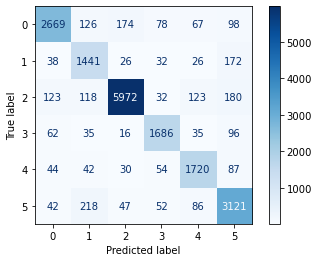

In [19]:
# Logistic Regression with TF-IDF representation

from sklearn.feature_extraction.text import TfidfVectorizer

pipe = Pipeline(steps=[('preprocessor', TfidfVectorizer(stop_words='english',
                                                        ngram_range=(1,2),
                                                        binary=True)),
                       ('model', LogisticRegression(max_iter=1000,
                                                    class_weight='balanced',
                                                    penalty='l2',
                                                    solver='newton-cg'))])

fit_pipe = pipe.fit(train_df['text'], train_df['label'])

# TODO: Write code here to solve Problem 5
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from numpy import interp

plot_confusion_matrix(fit_pipe, test_df['text'], test_df['label'], cmap=plt.cm.Blues)

plt.show()

## Results